In [57]:
import pandas as pd

# Define the data
data = {
    'Type': ['Al', 'Al', 'Poly', 'Poly', 'Plastic', 'Plastic', 'Al', 'Al', 'Al', 'Al', 'Al', 'Al', 'Al', 'Al', 'Al', 'Al', 'Lead', 'Lead', 'Lead', 'Lead'],
    'Density(mg/cm^2)': [4.5, 6.5, 9.6, 19.2, 59.1, 102, 141, 170, 216, 258, 328, 425, 522, 645, 655, 840, 1120, 2066, 3448, 7367],
    '1': [1076, 1052, 1085, 1064, 833, 775, 577, 470, 326, 251, 134, 85, 46, 41, 35, 31, 29, 26, 24, 17],
    '2': [1090, 1073, 1130, 1038, 852, 755, 589, 472, 332, 252, 140, 79, 49, 38, 35, 32, 28, 28, 26, 19],
    '3': [1113, 1101, 1117, 1060, 826, 735, 585, 461, 337, 254, 142, 85, 50, 39, 34, 32, 29, 27, 23, 21],
    '4': [1075, 1008, 1064, 1058, 825, 752, 578, 458, 328, 251, 142, 93, 47, 37, 36, 30, 29, 28, 26, 16]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the mean and count rate
df['Mean'] = df[['1', '2', '3', '4']].mean(axis=1)
df['Count Rate'] = df['Mean'] / 30

# Format the count rate to 2 decimal places
df['Count Rate'] = df['Count Rate'].round(2)

# Display the results
print(df[['Type', 'Density(mg/cm^2)', '1', '2', '3', '4', 'Mean', 'Count Rate']])

       Type  Density(mg/cm^2)     1     2     3     4     Mean  Count Rate
0        Al               4.5  1076  1090  1113  1075  1088.50       36.28
1        Al               6.5  1052  1073  1101  1008  1058.50       35.28
2      Poly               9.6  1085  1130  1117  1064  1099.00       36.63
3      Poly              19.2  1064  1038  1060  1058  1055.00       35.17
4   Plastic              59.1   833   852   826   825   834.00       27.80
5   Plastic             102.0   775   755   735   752   754.25       25.14
6        Al             141.0   577   589   585   578   582.25       19.41
7        Al             170.0   470   472   461   458   465.25       15.51
8        Al             216.0   326   332   337   328   330.75       11.02
9        Al             258.0   251   252   254   251   252.00        8.40
10       Al             328.0   134   140   142   142   139.50        4.65
11       Al             425.0    85    79    85    93    85.50        2.85
12       Al             5

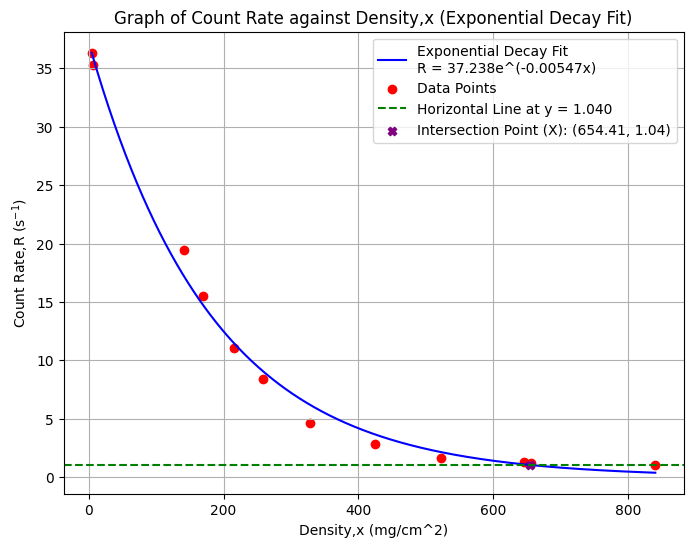

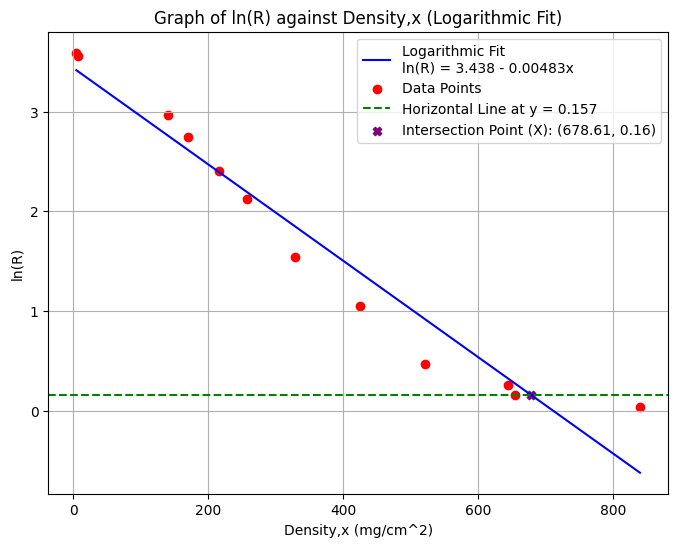

The range of β particles in aluminium (β1) is the x-value of intersection points of first graph: 654.41 mg/cm^2
The range of β particles in aluminium (β2) is the x-value of intersection points of second graph: 678.61 mg/cm^2
Percentage difference between β1 and β2 = 3.63 %
μ_m_exp = 0.00546768 cm^2/mg
μ_m_log = 0.00483452 cm^2/mg
Percentage difference between μ from two formulas = 12.29 %
The half-thickness value (X_1/2) for β particles in the aluminium absorber (β2) is 143.37 mg/cm^2


In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

# Data
data = {
    'Density (mg/cm^2)': [4.5, 6.5, 141.0, 170.0, 216.0, 258.0, 328.0, 425.0, 522.0, 645.0, 655.0, 840.0],
    'Count Rate': [36.28, 35.28, 19.41, 15.51, 11.02, 8.40, 4.65, 2.85, 1.60, 1.29, 1.17, 1.04]
}

df = pd.DataFrame(data)
density = np.array(df['Density (mg/cm^2)'])
count_rate = np.array(df['Count Rate'])
log_count_rate = np.log(count_rate)

# Exponential decay function for curve fitting
def exponential_decay(x, R0, mu):
    return R0 * np.exp(-mu * x)

# Perform curve fitting with bounds to avoid overflow issues
params, covariance = curve_fit(exponential_decay, density, count_rate, bounds=(0, [100, 0.01]))
R0, mu = params

# Generate data for the fitted curve
density_smooth = np.linspace(density.min(), density.max(), 500)
count_rate_fitted = exponential_decay(density_smooth, R0, mu)

# Find the intersection point of the horizontal line with the fitted curve
y_horizontal_exp = count_rate[-1]
x_intersection_exp = (np.log(y_horizontal_exp / R0)) / (-mu)
y_intersection_exp = exponential_decay(x_intersection_exp, R0, mu)

# Plotting the fitted exponential decay curve
plt.figure(figsize=(8, 6))
plt.plot(density_smooth, count_rate_fitted, color='b', label=f'Exponential Decay Fit\nR = {R0:.3f}e^(-{mu:.5f}x)')
plt.scatter(density, count_rate, color='r', label='Data Points')
plt.axhline(y=y_horizontal_exp, color='g', linestyle='--', label=f'Horizontal Line at y = {y_horizontal_exp:.3f}')
plt.scatter(x_intersection_exp, y_intersection_exp, color='purple', marker='X', label=f'Intersection Point (X): ({x_intersection_exp:.2f}, {y_intersection_exp:.2f})')
plt.xlabel('Density,x (mg/cm^2)')
plt.ylabel('Count Rate,R (s$^{-1}$)')
plt.title('Graph of Count Rate against Density,x (Exponential Decay Fit)')
plt.legend()
plt.grid(True)
plt.show()

# Linear regression for the logarithmic data
model = LinearRegression()
density_reshaped = density.reshape(-1, 1)
model.fit(density_reshaped, log_count_rate)
lnR0 = model.intercept_
mu_log = -model.coef_[0]

# Generate data for the fitted log curve
log_count_rate_fitted = model.predict(density_smooth.reshape(-1, 1))

# Find the intersection point of the horizontal line with the fitted log curve
y_horizontal_log = log_count_rate[-2]
x_intersection_log = (lnR0 - y_horizontal_log) / mu_log
y_intersection_log = lnR0 - mu_log * x_intersection_log

# Plotting the logarithmic fit
plt.figure(figsize=(8, 6))
plt.plot(density_smooth, log_count_rate_fitted, color='b', label=f'Logarithmic Fit\nln(R) = {lnR0:.3f} - {mu_log:.5f}x')
plt.scatter(density, log_count_rate, color='r', label='Data Points')
plt.axhline(y=y_horizontal_log, color='g', linestyle='--', label=f'Horizontal Line at y = {y_horizontal_log:.3f}')
plt.scatter(x_intersection_log, y_intersection_log, color='purple', marker='X', label=f'Intersection Point (X): ({x_intersection_log:.2f}, {y_intersection_log:.2f})')
plt.xlabel('Density,x (mg/cm^2)')
plt.ylabel('ln(R)')
plt.title('Graph of ln(R) against Density,x (Logarithmic Fit)')
plt.legend()
plt.grid(True)
plt.show()

# Printing the results
print(f"The range of β particles in aluminium (β1) is the x-value of intersection points of first graph: {x_intersection_exp:.2f} mg/cm^2")
print(f"The range of β particles in aluminium (β2) is the x-value of intersection points of second graph: {x_intersection_log:.2f} mg/cm^2")

# Calculating the percentage difference
percentage_difference = abs(x_intersection_exp - x_intersection_log) / ((x_intersection_exp + x_intersection_log) / 2) * 100
print(f"Percentage difference between β1 and β2 = {percentage_difference:.2f} %")

# Given equations and calculations
print(f"μ_m_exp = {mu:.8f} cm^2/mg")

print(f"μ_m_log = {mu_log:.8f} cm^2/mg")

# Calculating the percentage difference for μ
percentage_difference_mu = abs(mu - mu_log) / ((mu + mu_log) / 2) * 100
print(f"Percentage difference between μ from two formulas = {percentage_difference_mu:.2f} %")

# Calculating the half-thickness value (X1/2)
X_half2 = -np.log(1/2) / mu_log
print(f"The half-thickness value (X_1/2) for β particles in the aluminium absorber (β2) is {X_half2:.2f} mg/cm^2")
